Backtracking: Early stopping at iteration 1944
Ternary Search: Early stopping at iteration 1212


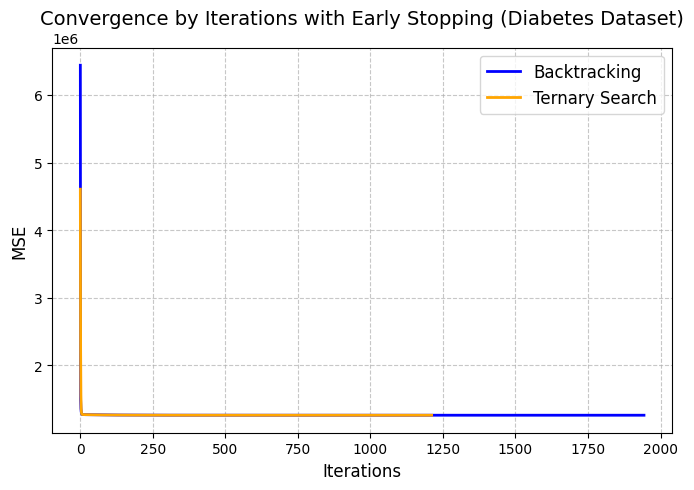

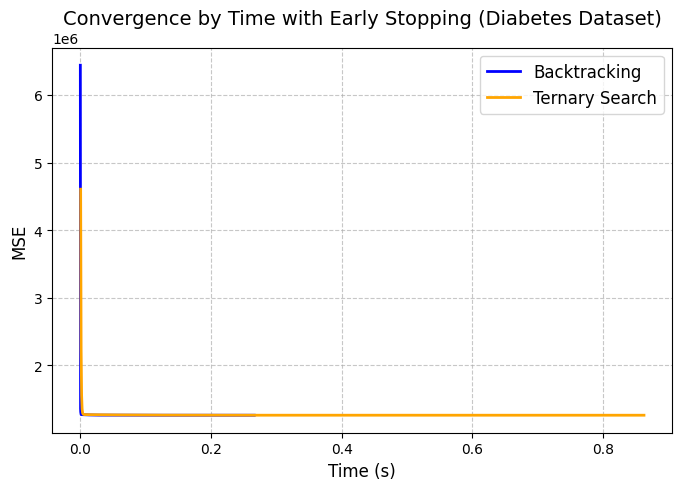

In [2]:
import numpy as np
import time
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.preprocessing import StandardScaler

# Load and preprocess the Diabetes dataset
data = load_diabetes()
A = data.data  # Features (442 samples, 10 features)
b = data.target  # Target (442 values)

# Standardize features and add bias term (intercept)
scaler = StandardScaler()
A = scaler.fit_transform(A)
A = np.column_stack([np.ones(len(A)), A])  # Add column of 1s for intercept

# Initialize parameters
x_initial = np.zeros(A.shape[1])

# Define loss and gradient
def f(x, A, b):
    return np.linalg.norm(A @ x - b) ** 2

def grad(x, A, b):
    return 2 * A.T @ (A @ x - b)

# Backtracking Line Search
def backtracking(x, A, b, alpha=0.2, beta=0.5):
    t = 1.0
    grad_x = grad(x, A, b)
    while f(x - t * grad_x, A, b) > f(x, A, b) - alpha * t * np.linalg.norm(grad_x) ** 2:
        t *= beta
    return t

# Improved Ternary Search with epsilon-based stopping
def ternary_search(x, A, b, epsilon=1e-6, max_iter=100):
    l, r = 0, 1
    for _ in range(max_iter):
        if r - l < epsilon:
            break
        m1 = l + (r - l) / 3
        m2 = r - (r - l) / 3
        if f(x - m1 * grad(x, A, b), A, b) < f(x - m2 * grad(x, A, b), A, b):
            r = m2
        else:
            l = m1
    return (l + r) / 2

# Gradient Descent with Backtracking and Early Stopping
def gd_backtracking(x_initial, A, b, max_iter=2000, tol=1e-6):
    x = x_initial.copy()
    f_vals, times = [], []
    start = time.time()
    for i in range(max_iter):
        t = backtracking(x, A, b)
        x_new = x - t * grad(x, A, b)
        current_loss = f(x_new, A, b)
        f_vals.append(current_loss)
        times.append(time.time() - start)
        
        # Early stopping condition
        if i > 0 and abs(f_vals[-2] - f_vals[-1]) < tol:
            print(f"Backtracking: Early stopping at iteration {i+1}")
            break
            
        x = x_new
    return f_vals, times

# Gradient Descent with Ternary Search and Early Stopping
def gd_ternary(x_initial, A, b, max_iter=2000, tol=5e-4):
    x = x_initial.copy()
    f_vals, times = [], []
    start = time.time()
    for i in range(max_iter):
        t = ternary_search(x, A, b)
        x_new = x - t * grad(x, A, b)
        current_loss = f(x_new, A, b)
        f_vals.append(current_loss)
        times.append(time.time() - start)
        
        # Early stopping condition
        if i > 0 and abs(f_vals[-2] - f_vals[-1]) < tol:
            print(f"Ternary Search: Early stopping at iteration {i+1}")
            break
            
        x = x_new
    return f_vals, times

# Run both methods with early stopping
f_back, t_back = gd_backtracking(x_initial, A, b)
f_tern, t_tern = gd_ternary(x_initial, A, b)

plt.figure(figsize=(8, 5))
plt.plot(f_back, label="Backtracking", color='blue', linewidth=2)
plt.plot(f_tern, label="Ternary Search", color='orange', linewidth=2)
plt.xlabel("Iterations", fontsize=12)
plt.ylabel("MSE", fontsize=12)
plt.title("Convergence by Iterations with Early Stopping (Diabetes Dataset)", fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.savefig("convergence_iterations_diabetes_early_stop.png", dpi=300, bbox_inches='tight')
plt.show()

plt.figure(figsize=(8, 5))
plt.plot(t_back, f_back, label="Backtracking", color='blue', linewidth=2)
plt.plot(t_tern, f_tern, label="Ternary Search", color='orange', linewidth=2)
plt.xlabel("Time (s)", fontsize=12)
plt.ylabel("MSE", fontsize=12)
plt.title("Convergence by Time with Early Stopping (Diabetes Dataset)", fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.savefig("convergence_time_diabetes_early_stop.png", dpi=300, bbox_inches='tight')
plt.show()